In [5]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# 3D to 2D conversion

Different ideas for 3D to 2D:
- MIP over tumor range
- Mean IP over image
- slice at center of tumor
- Mask MIP
- Image x Mask MIP


## load an image


In [9]:
image = sitk.ReadImage('c:/users/sven/Documents/BEP_data/simplified_data\B04\IMAGES\B04.nii.gz')
img_data = sitk.GetArrayFromImage(image)

mask = sitk.ReadImage('c:/users/sven/Documents/BEP_data/simplified_data\B04\MASKS\B04.nii.gz')
mask_data = sitk.GetArrayFromImage(mask)

## MIP over tumor range

#### Tumor range


In [18]:
def tumor_range(mask: np.ndarray)->tuple:
    """ Find the start and end z-value of the tumor using the mask.
    
    """
    non_zero_rows = np.any(mask, axis=(1, 2))
    first_non_zero_row = np.argmax(non_zero_rows)
    last_non_zero_row = mask_data.shape[0] - 1 - np.argmax(non_zero_rows[::-1])
    
    return first_non_zero_row, last_non_zero_row
    

#### Crop image over tumor range

In [33]:
def crop_image_tr(image: np.ndarray, mask: np.ndarray)->np.ndarray:
    """Crop the image according to the tumor range.
    
    """
    x1, x2 = tumor_range(mask)
    cropped_image = image[x1:x2+1, :, :]
    
    return cropped_image

#### Maximum intensity projection

In [36]:
def mip_tr(image: np.ndarray, mask: np.ndarray)->np.ndarray:
    """Create the maximum intensity projection.
    """
    return np.max(crop_image_tr(image,mask), axis=0)

#### visualization

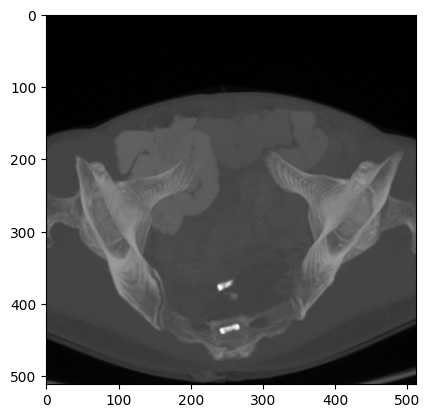

In [42]:
plt.imshow(mip_tr(img_data,mask_data), cmap='gray')
plt.show()

## Mean image projection


In [39]:
def mean_ip(image: np.ndarray)->np.ndarray:
    """Create a mean image projection.
    """
    return np.mean(image,axis=0)

#### Visualization

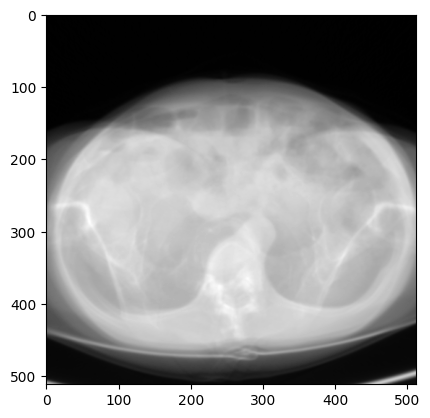

In [43]:
plt.imshow(mean_ip(img_data), cmap='gray')
plt.show()

## Slice at center of tumor

In [50]:
def find_tumor_center(mask: np.ndarray)->int:
    """Find the center of the tumor. 
    """
    
    return np.argmax(np.sum(mask, axis=(1, 2)))

In [51]:
def slice_tumor_center(image: np.ndarray, mask: np.ndarray)->np.ndarray:
    """Take a slice at the center of the tumor.
    """
    x1 = find_tumor_center(mask)
    return image[x1, :, :]

#### Visualization

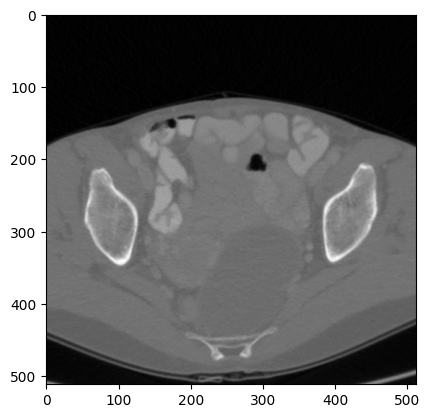

In [49]:
plt.imshow(slice_tumor_center(img_data, mask_data), cmap='gray')
plt.show()

## Mask MIP


In [53]:
def mask_mip(mask: np.ndarray)->np.ndarray:
    """Create a MIP of the mask.
    """
    return np.max(mask, axis=0)
    

#### Visualization


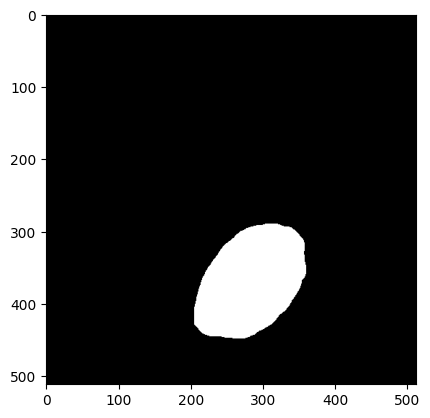

In [59]:
plt.imshow(mask_mip(mask_data), cmap='gray')
plt.show()

## Image x Mask MIP

In [61]:
def tumor_mip(image: np.ndarray, mask: np.ndarray)->np.ndarray:
    """Return the mip of the tumor only.
    """
    
    return np.max(image * mask, axis=0)

#### Visualization

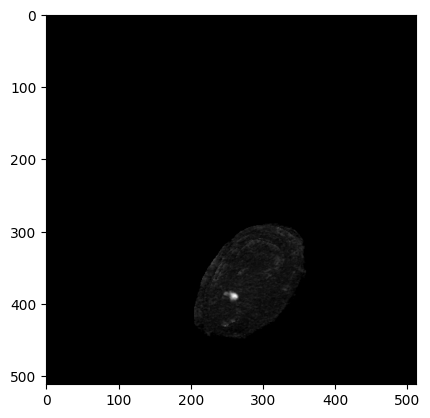

In [63]:
plt.imshow(tumor_mip(img_data, mask_data), cmap='gray')
plt.show()